## Question 5

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [24]:
data = pd.read_csv('face.csv')
print(data.shape)
data.head(401)

(400, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223141,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [25]:
# splitting into train and test data
train_data = pd.concat([data.iloc[i*10+2:(i+1)*10] for i in range(40)])
train_data.reset_index(drop=True, inplace=True)
test_data = pd.concat([data.iloc[i*10:i*10+2] for i in range(40)])
test_data.reset_index(drop=True, inplace=True)

labels = list(train_data['target'])
X = np.array(train_data.iloc[:,:-1])

height,width = X.shape
classes = np.unique(labels)

In [26]:
c = len(classes)
d_= c-1
d = {}
for i in range(len(classes)):
    d[classes[i]]=i
    
class_wise_data=[np.empty((0,)+X[0].shape,float) for i in classes]

for i in range(len(X)):
    class_wise_data[d[labels[i]]]=np.append(class_wise_data[d[labels[i]]], np.array([X[i],]),axis=0)

# calculating class wise means
means=[]
for i in class_wise_data:
    means.append(np.mean(i,axis=0))
    
# calculating within class scatter matrix
Sw = np.zeros((width,width))
for i,data in enumerate(class_wise_data):
    z = data-means[i]
    Sw += (z.T @ z)

Sw_inv = np.linalg.inv(Sw)

In [27]:
# calculating between class scatter matrix
overall_mean = np.mean(X,axis=0)
Sb = np.zeros((width,width))

for i, data in enumerate(means):
    Ni = len(class_wise_data[i])
    z = np.array([means[i]-overall_mean])	
    Sb += (Ni * (z.T @ z))

M = Sw_inv @ Sb

eigen_values , eigen_vectors = np.linalg.eigh(M)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

sorted_eigenvalue = eigen_values[sorted_index].astype(np.float64)

eigenvector_subset = sorted_eigenvectors[:,0:d_]
Y = X @ eigenvector_subset

In [28]:
reduced = Y
reduced = pd.DataFrame(reduced)

In [29]:
model = GaussianNB()
model.fit(reduced,train_data["target"])

GaussianNB()

In [30]:
test_reduced=(test_data.iloc[:,:-1]).dot(eigenvector_subset)
predicted= model.predict(test_reduced) 
test_reduced['target']=test_data['target']
test_reduced['predicted'] = predicted

Accuracy = 88.75


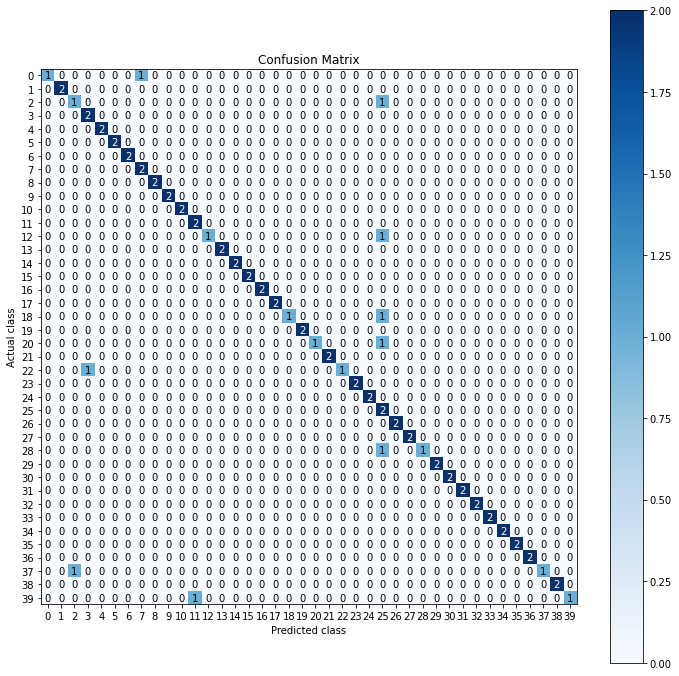

In [33]:
acc=[]
for i in test_reduced.index:
    if test_reduced['target'][i] == test_reduced['predicted'][i]:
        acc.append("correct")
    else:
        acc.append("wrong")

test_reduced["correctness"] = acc

x = accuracy_score(test_reduced["target"], predicted)
print("Accuracy =",x*100)

skplt.metrics.plot_confusion_matrix(test_reduced["target"], predicted, figsize=(12,12))
plt.xlabel('Predicted class')
plt.ylabel('Actual class')

plt.show()